<a href="https://colab.research.google.com/github/pumkinni/book_study/blob/master/%ED%98%BC%EA%B3%B5_%EB%A8%B8_%EB%94%A5_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀
> k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고 사이킷런을 사용해 여러가지 선형회기 모델을 만들어 보기

### k-최근접 이웃의 한계

In [ ]:
# 데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 훈련데이터와 테스트데이터 구분
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42, 1), (14, 1), (42,), (14,))

In [ ]:
# k-최근접 이웃 알고리즘을 이용하여 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 50cm 농어의 무게 예측(실제보다 작음)
print(knr.predict([[50]]))

[1033.33333333]


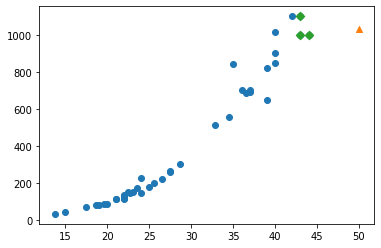

In [ ]:
# 산점도를 이용하여 알아보기
import matplotlib.pyplot as plt

distance, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(50, knr.predict([[50]]), marker = "^")
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")
plt.xlabel = 'length'
plt.ylabel = 'weight'

In [ ]:
# 이웃들의 평균과 같다
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


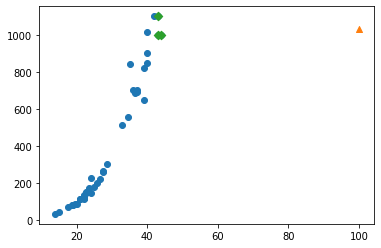

In [ ]:
# 50cm일때와 100cm일 때의 무게가 같다
distance, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(100, knr.predict([[100]]), marker = "^")
plt.scatter(train_input[indexes], train_target[indexes], marker = "D")
plt.xlabel = 'length'
plt.ylabel = 'weight'

### 선형 회귀(LinearRegression)

In [ ]:
# 선형회귀로 모델 훈련 및 정확도 확인
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
lr.score(test_input, test_target)

0.8247503123313558

In [ ]:
lr.predict([[50]])

array([1241.83860323])

In [ ]:
# 모델 파라미터 구하기(기울기와 절편)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


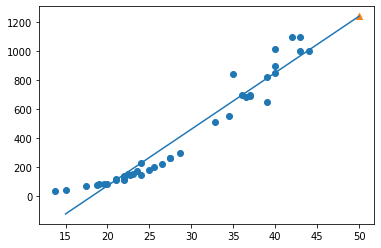

In [ ]:
# 구한 기울기와 절편을 사용하여 직선 그리기(무게가 음수가 될수 있다.)
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, lr.predict([[50]]), marker = "^")
plt.xlabel = "length"
plt.ylabel = 'weight'

In [ ]:
# 과소적합
lr.score(train_input, train_target), lr.score(test_input, test_target)

(0.939846333997604, 0.8247503123313558)

다항 회귀

In [ ]:
# 이차함수로 만들기 위해 길이^2을 추가해줌
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
train_poly.shape, test_poly.shape

((42, 2), (14, 2))

In [ ]:
# 새로만든 데이터로 훈련 및 예측
lr.fit(train_poly, train_target)

print(lr.predict([[50*50, 50]]))

[1573.98423528]


In [ ]:
# 파라미터 구하기
lr.coef_, lr.intercept_

(array([  1.01433211, -21.55792498]), 116.0502107827827)

<function matplotlib.pyplot.show>

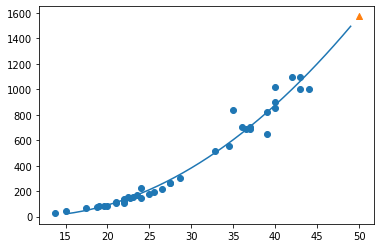

In [ ]:
# 이차함수 곡선과 산점도 나타내기
points = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(points, lr.coef_[0] * points**2 + lr.coef_[1] * points + lr.intercept_)

plt.scatter(50, lr.predict([[50*50, 50]]), marker = "^")
plt.xlabel = 'length'
plt.ylabel = 'weight'
plt.show

In [ ]:
# 정확도는 높아졌으나 여전히 과소적합이 남아있음
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9706807451768623, 0.9775935108325122)